In [ ]:
from accelerate import Accelerator  

# 创建一个Accelerator实例，并设置日志存储路径logging_dir  
accelerator = Accelerator(logging_dir="./logs") 

In [ ]:
!pip install onnx onnxruntime

In [1]:
!sudo apt install graphviz -y


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


In [3]:
!pip install torchviz

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/906.4 MB 2.9 MB/s eta 0:03:53^C
     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/906.4 MB 2.9 MB/s eta 0:03:53
ERROR: Operation cancelled by user


In [ ]:
import torch
from torch import nn
# from torchvision import models
from torchviz import makee_dot, make_dot_from_trace

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

/tmp/ipykernel_1852/1221664822.py:108: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(bbox_to_anchor=(0.5, 1.15), loc='center', ncol=3,


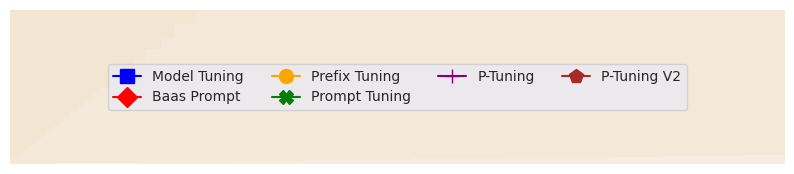

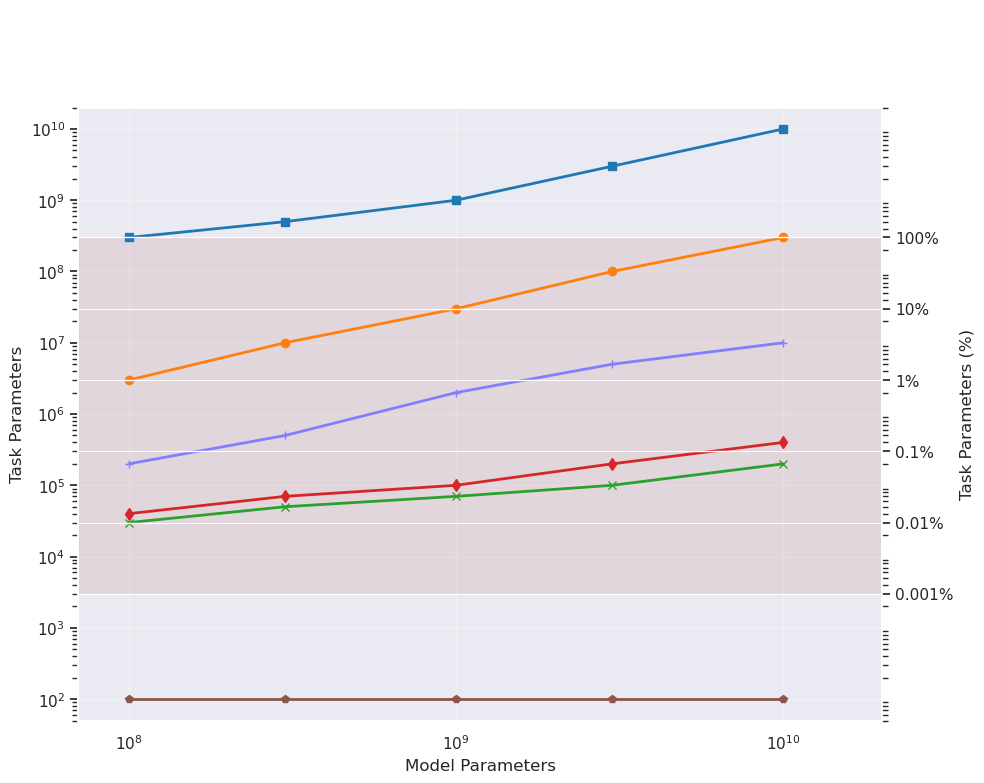

In [15]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from matplotlib.lines import Line2D  

# 设置风格  
# plt.style.use('seaborn')  

# Seaborn 会自动应用样式  
sns.set_theme()  
sns.set_palette("deep")  




# 定义图例元素  
legend_elements = [  
    Line2D([0], [0], color='blue', marker='s', markersize=10, label='Model Tuning'),  
    Line2D([0], [0], color='red', marker='D', markersize=10, label='Baas Prompt'),  
    Line2D([0], [0], color='orange', marker='o', markersize=10, label='Prefix Tuning'),  
    Line2D([0], [0], color='green', marker='X', markersize=10, label='Prompt Tuning'),  
    Line2D([0], [0], color='purple', marker='+', markersize=10, label='P-Tuning'),  
    Line2D([0], [0], color='brown', marker='p', markersize=10, label='P-Tuning V2'),  
]  

# 创建图例  
fig, ax = plt.subplots(figsize=(10, 2))  
ax.legend(handles=legend_elements, loc='center', frameon=True, ncol=4, fontsize=10)  
ax.axis('off')  # 隐藏坐标轴  

# 显示图例  
# plt.show()  




# 数据  
x = np.array([1e8, 3e8, 1e9, 3e9, 1e10])  
model_tuning = np.array([3e8, 5e8, 1e9, 3e9, 1e10])  
prefix_train = np.array([3e6, 1e7, 3e7, 1e8, 3e8])  
prefix_infer = np.array([2e5, 5e5, 2e6, 5e6, 1e7])  
warp = np.array([4e4, 7e4, 1e5, 2e5, 4e5])  
prompt_tuning = np.array([3e4, 5e4, 7e4, 1e5, 2e5])  
prompt_design = np.array([100, 100, 100, 100, 100])  





# 创建斜向渐变背景  
x_min, x_max = 7e7, 2e10  
y_min, y_max = 5e1, 2e10  

# 创建网格点  
xx, yy = np.meshgrid(np.logspace(np.log10(x_min), np.log10(x_max), 200),  
                     np.logspace(np.log10(y_min), np.log10(y_max), 200))  

# 计算每个点的比例值（取对数以使带子均匀分布）  
zz = np.log10(yy/xx)  

# 创建自定义颜色映射  
colors = [(0.98, 0.93, 0.87),  # 最浅的棕色  
          (0.95, 0.87, 0.78),  
          (0.92, 0.82, 0.69),  
          (0.89, 0.77, 0.60),  
          (0.86, 0.72, 0.51),  
          (0.83, 0.67, 0.42)]  
n_bins = 6  
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)  

# 绘制背景  
plt.pcolormesh(xx, yy, zz, cmap=cmap, alpha=0.3, shading='auto')



# 创建图形  
fig, ax = plt.subplots(figsize=(10, 8))  

# 绘制线条  
ax.plot(x, model_tuning, '-s', label='Model Tuning', color='#1f77b4', linewidth=2)  
ax.plot(x, prefix_train, '-o', label='Prefix Tuning', color='#ff7f0e', linewidth=2)  
ax.plot(x, prefix_infer, '-+', label='P-Tuning', color='#7f7fff', linewidth=2)  
ax.plot(x, warp, '-d', label='Baas Prompt', color='#d62728', linewidth=2)  
ax.plot(x, prompt_tuning, '-x', label='Prompt Tuning', color='#2ca02c', linewidth=2)  
ax.plot(x, prompt_design, '-p', label='P-Tuning V2', color='#8c564b', linewidth=2)  

# 设置坐标轴  
ax.set_xscale('log')  
ax.set_yscale('log')  
ax.set_xlim(7e7, 2e10)  
ax.set_ylim(5e1, 2e10)  
ax.set_xlabel('Model Parameters', fontsize=12)  
ax.set_ylabel('Task Parameters', fontsize=12)  

# 添加网格  
ax.grid(True, alpha=0.3)  

# 添加百分比刻度  
ax_right = ax.twinx()  
percentages = [100, 10, 1, 0.1, 0.01, 0.001]  
ax_right.set_yscale('log')  
ax_right.set_ylim(ax.get_ylim())  
ax_right.set_ylabel('Task Parameters (%)', fontsize=12)  
ax_right.set_yticks([model_tuning[0] * p/100 for p in percentages])  
ax_right.set_yticklabels([f'{p}%' for p in percentages])  

# 添加图例  
legend = plt.legend(bbox_to_anchor=(0.5, 1.15), loc='center', ncol=3,   
                   frameon=True, facecolor='white', edgecolor='none')  

# 添加渐变背景  
for i in range(len(percentages)-1):  
    y1 = model_tuning[0] * percentages[i]/100  
    y2 = model_tuning[0] * percentages[i+1]/100  
    ax.axhspan(y2, y1, color='brown', alpha=0.1)  

plt.tight_layout()  
plt.savefig('parameter_comparison.pdf', bbox_inches='tight', dpi=300)  
plt.show()

/tmp/ipykernel_1852/954016591.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(bbox_to_anchor=(0.5, 1.15), loc='center', ncol=3,


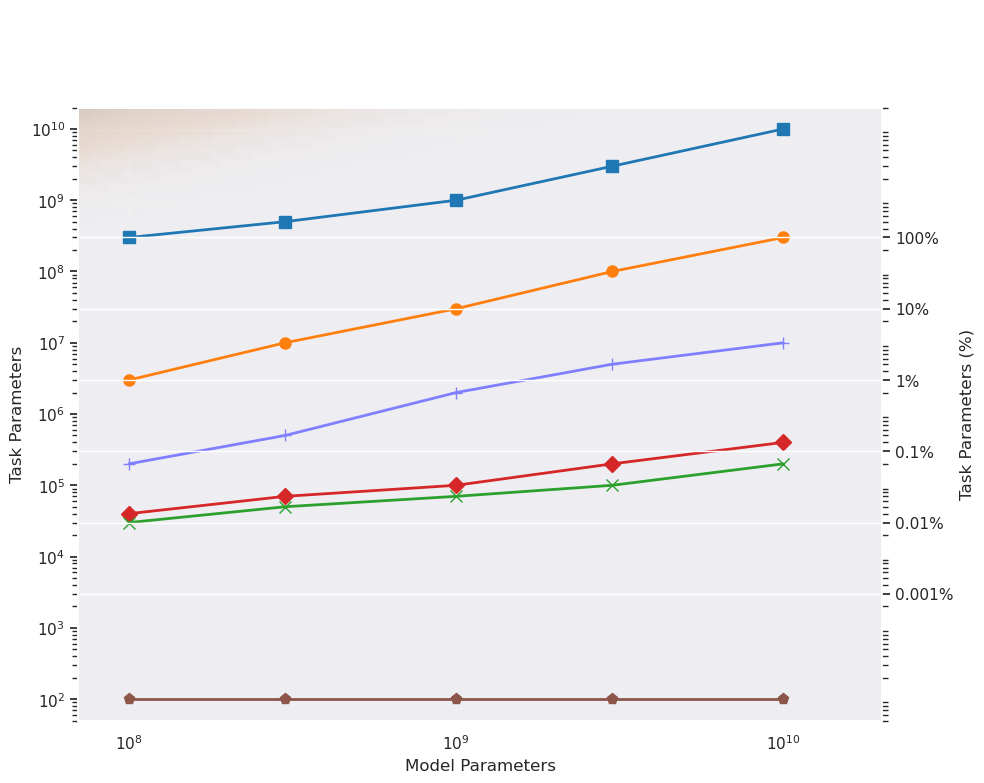

In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap  

# 创建图形  
plt.figure(figsize=(10, 8))  
ax = plt.gca()  

# 数据  
x = np.array([1e8, 3e8, 1e9, 3e9, 1e10])  
model_tuning = np.array([3e8, 5e8, 1e9, 3e9, 1e10])  
prefix_train = np.array([3e6, 1e7, 3e7, 1e8, 3e8])  
prefix_infer = np.array([2e5, 5e5, 2e6, 5e6, 1e7])  
warp = np.array([4e4, 7e4, 1e5, 2e5, 4e5])  
prompt_tuning = np.array([3e4, 5e4, 7e4, 1e5, 2e5])  
prompt_design = np.array([100, 100, 100, 100, 100])  

# 创建斜向渐变背景  
x_min, x_max = 7e7, 2e10  
y_min, y_max = 5e1, 2e10  

# 创建网格点  
xx, yy = np.meshgrid(np.logspace(np.log10(x_min), np.log10(x_max), 100),  
                     np.logspace(np.log10(y_min), np.log10(y_max), 100))  

# 计算每个点的比例值  
zz = yy / xx  

# 创建自定义颜色映射  
colors = [(0.95, 0.95, 0.95),  # 最浅的颜色（接近白色）  
          (0.9, 0.8, 0.7),    # 浅棕色  
          (0.85, 0.75, 0.65),  
          (0.8, 0.7, 0.6),  
          (0.75, 0.65, 0.55)]  
n_bins = 50  
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)  

# 绘制背景  
plt.pcolormesh(xx, yy, zz, cmap=cmap, alpha=0.5, shading='auto')  

# 绘制线条  
ax.plot(x, model_tuning, '-s', label='Model Tuning', color='#1f77b4', linewidth=2, markersize=8)  
ax.plot(x, prefix_train, '-o', label='Prefix Tuning (Train)', color='#ff7f0e', linewidth=2, markersize=8)  
ax.plot(x, prefix_infer, '-+', label='Prefix Tuning (Infer)', color='#7f7fff', linewidth=2, markersize=8)  
ax.plot(x, warp, '-D', label='WARP', color='#d62728', linewidth=2, markersize=8)  
ax.plot(x, prompt_tuning, '-x', label='Prompt Tuning', color='#2ca02c', linewidth=2, markersize=8)  
ax.plot(x, prompt_design, '-p', label='Prompt Design', color='#8c564b', linewidth=2, markersize=8)  

# 设置坐标轴  
ax.set_xscale('log')  
ax.set_yscale('log')  
ax.set_xlim(x_min, x_max)  
ax.set_ylim(y_min, y_max)  
ax.set_xlabel('Model Parameters', fontsize=12)  
ax.set_ylabel('Task Parameters', fontsize=12)  

# 添加网格  
ax.grid(True, alpha=0.3)  

# 添加百分比刻度  
ax_right = ax.twinx()  
percentages = [100, 10, 1, 0.1, 0.01, 0.001]  
ax_right.set_yscale('log')  
ax_right.set_ylim(ax.get_ylim())  
ax_right.set_ylabel('Task Parameters (%)', fontsize=12)  
ax_right.set_yticks([model_tuning[0] * p/100 for p in percentages])  
ax_right.set_yticklabels([f'{p}%' for p in percentages])  

# 添加图例  
legend = plt.legend(bbox_to_anchor=(0.5, 1.15), loc='center', ncol=3,   
                   frameon=True, facecolor='white', edgecolor='none')  

plt.tight_layout()  
plt.savefig('parameter_comparison.pdf', bbox_inches='tight', dpi=300)  
plt.show()

/tmp/ipykernel_1852/231047567.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(bbox_to_anchor=(0.5, 1.15), loc='center', ncol=3,


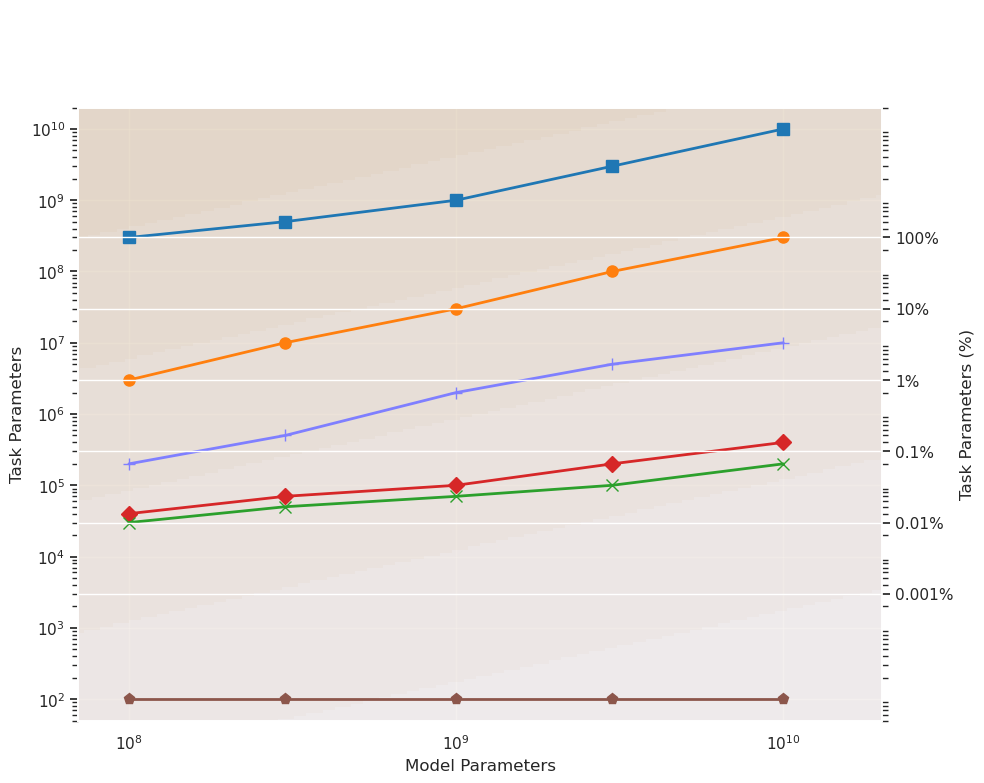

In [13]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap  

# 创建图形  
plt.figure(figsize=(10, 8))  
ax = plt.gca()  

# 数据  
x = np.array([1e8, 3e8, 1e9, 3e9, 1e10])  
model_tuning = np.array([3e8, 5e8, 1e9, 3e9, 1e10])  
prefix_train = np.array([3e6, 1e7, 3e7, 1e8, 3e8])  
prefix_infer = np.array([2e5, 5e5, 2e6, 5e6, 1e7])  
warp = np.array([4e4, 7e4, 1e5, 2e5, 4e5])  
prompt_tuning = np.array([3e4, 5e4, 7e4, 1e5, 2e5])  
prompt_design = np.array([100, 100, 100, 100, 100])  

# 创建斜向渐变背景  
x_min, x_max = 7e7, 2e10  
y_min, y_max = 5e1, 2e10  

# 创建网格点  
xx, yy = np.meshgrid(np.logspace(np.log10(x_min), np.log10(x_max), 200),  
                     np.logspace(np.log10(y_min), np.log10(y_max), 200))  

# 计算每个点的比例值（取对数以使带子均匀分布）  
zz = np.log10(yy/xx)  

# 创建自定义颜色映射  
colors = [(0.98, 0.93, 0.87),  # 最浅的棕色  
          (0.95, 0.87, 0.78),  
          (0.92, 0.82, 0.69),  
          (0.89, 0.77, 0.60),  
          (0.86, 0.72, 0.51),  
          (0.83, 0.67, 0.42)]  
n_bins = 6  
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)  

# 绘制背景  
plt.pcolormesh(xx, yy, zz, cmap=cmap, alpha=0.3, shading='auto')  

# 绘制线条  
ax.plot(x, model_tuning, '-s', label='Model Tuning', color='#1f77b4', linewidth=2, markersize=8)  
ax.plot(x, prefix_train, '-o', label='Prefix Tuning (Train)', color='#ff7f0e', linewidth=2, markersize=8)  
ax.plot(x, prefix_infer, '-+', label='Prefix Tuning (Infer)', color='#7f7fff', linewidth=2, markersize=8)  
ax.plot(x, warp, '-D', label='WARP', color='#d62728', linewidth=2, markersize=8)  
ax.plot(x, prompt_tuning, '-x', label='Prompt Tuning', color='#2ca02c', linewidth=2, markersize=8)  
ax.plot(x, prompt_design, '-p', label='Prompt Design', color='#8c564b', linewidth=2, markersize=8)  

# 设置坐标轴  
ax.set_xscale('log')  
ax.set_yscale('log')  
ax.set_xlim(x_min, x_max)  
ax.set_ylim(y_min, y_max)  
ax.set_xlabel('Model Parameters', fontsize=12)  
ax.set_ylabel('Task Parameters', fontsize=12)  

# 添加网格  
ax.grid(True, alpha=0.3)  

# 添加百分比刻度  
ax_right = ax.twinx()  
percentages = [100, 10, 1, 0.1, 0.01, 0.001]  
ax_right.set_yscale('log')  
ax_right.set_ylim(ax.get_ylim())  
ax_right.set_ylabel('Task Parameters (%)', fontsize=12)  
ax_right.set_yticks([model_tuning[0] * p/100 for p in percentages])  
ax_right.set_yticklabels([f'{p}%' for p in percentages])  

# 添加图例  
legend = plt.legend(bbox_to_anchor=(0.5, 1.15), loc='center', ncol=3,   
                   frameon=True, facecolor='white', edgecolor='none')  

plt.tight_layout()  
plt.savefig('parameter_comparison.pdf', bbox_inches='tight', dpi=300)  
plt.show()

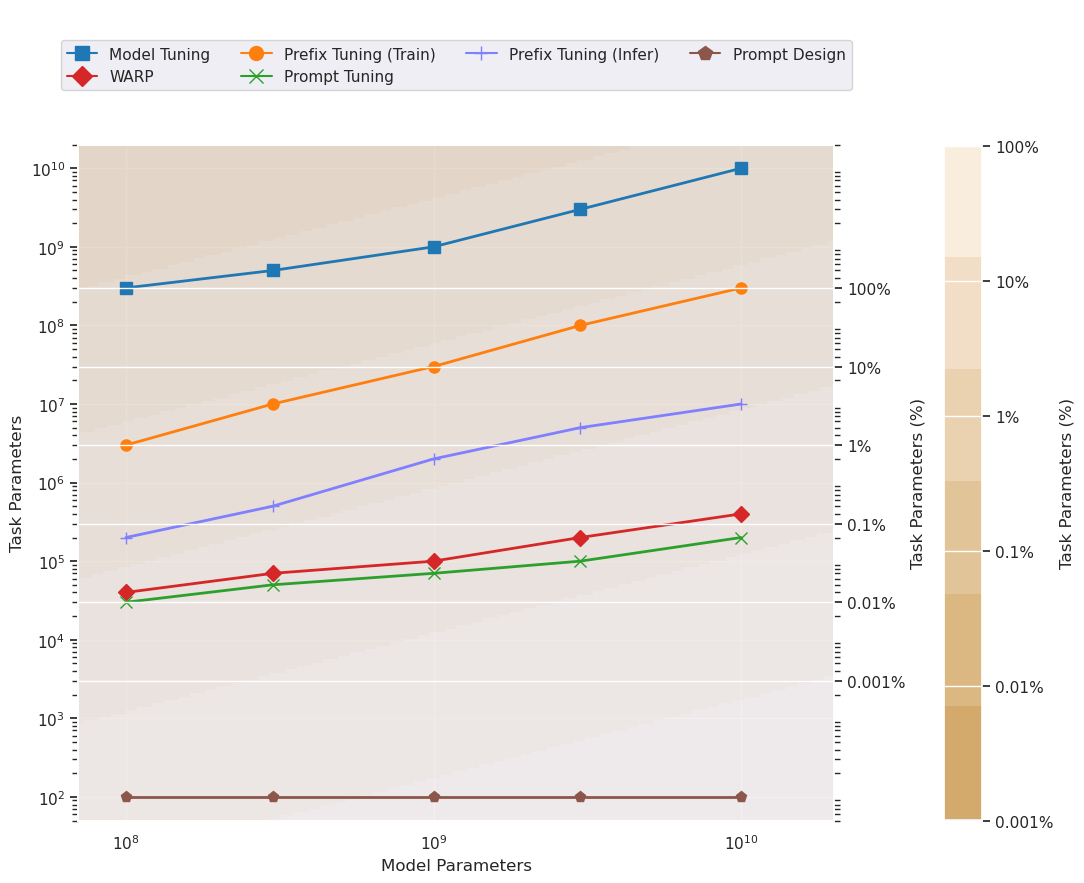

In [17]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap  
from matplotlib.lines import Line2D  
from matplotlib.gridspec import GridSpec  

# 创建图形和子图布局  
fig = plt.figure(figsize=(11, 9))  
# gs = GridSpec(2, 1, height_ratios=[1, 6])  
gs = GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[1, 6])  # 2x2的网格，右侧较窄
ax_legend = fig.add_subplot(gs[0,0])  # gs[0]
ax = fig.add_subplot(gs[1,0])    # gs[1]
ax_colorbar = fig.add_subplot(gs[1, 1])  # 颜色映射条

# 数据  
x = np.array([1e8, 3e8, 1e9, 3e9, 1e10])  
model_tuning = np.array([3e8, 5e8, 1e9, 3e9, 1e10])  
prefix_train = np.array([3e6, 1e7, 3e7, 1e8, 3e8])  
prefix_infer = np.array([2e5, 5e5, 2e6, 5e6, 1e7])  
warp = np.array([4e4, 7e4, 1e5, 2e5, 4e5])  
prompt_tuning = np.array([3e4, 5e4, 7e4, 1e5, 2e5])  
prompt_design = np.array([100, 100, 100, 100, 100])  

# 创建斜向渐变背景  
x_min, x_max = 7e7, 2e10  
y_min, y_max = 5e1, 2e10  

# 创建网格点  
xx, yy = np.meshgrid(np.logspace(np.log10(x_min), np.log10(x_max), 200),  
                     np.logspace(np.log10(y_min), np.log10(y_max), 200))  

# 计算每个点的比例值（取对数以使带子均匀分布）  
zz = np.log10(yy/xx)  

# 创建自定义颜色映射  
colors = [(0.98, 0.93, 0.87),  
          (0.95, 0.87, 0.78),  
          (0.92, 0.82, 0.69),  
          (0.89, 0.77, 0.60),  
          (0.86, 0.72, 0.51),  
          (0.83, 0.67, 0.42)]  
n_bins = 6  
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)  

# 绘制背景  
ax.pcolormesh(xx, yy, zz, cmap=cmap, alpha=0.3, shading='auto')  

# 定义颜色和样式  
colors = {  
    'Propmt-Tuning': '#1f77b4',  
    'Prefix-Tuning': '#d62728',  
    'P-Tuning': '#ff7f0e',  
    'P-Tuning V2': '#2ca02c',  
    'BaasPrompt': '#7f7fff',  
}  

markers = {  
    'Propmt-Tuning': 's',  
    'WARP': 'D',  
    'Prefix Tuning (Train)': 'o',  
    'Prompt Tuning': 'x',  
    'Prefix Tuning (Infer)': '+',  
    'Prompt Design': 'p'  
}  

# 绘制主图线条  
ax.plot(x, model_tuning, '-', color=colors['Model Tuning'], marker=markers['Model Tuning'],   
        label='Model Tuning', linewidth=2, markersize=8)  
ax.plot(x, prefix_train, '-', color=colors['Prefix Tuning (Train)'], marker=markers['Prefix Tuning (Train)'],   
        label='Prefix Tuning (Train)', linewidth=2, markersize=8)  
ax.plot(x, prefix_infer, '-', color=colors['Prefix Tuning (Infer)'], marker=markers['Prefix Tuning (Infer)'],   
        label='Prefix Tuning (Infer)', linewidth=2, markersize=8)  
ax.plot(x, warp, '-', color=colors['WARP'], marker=markers['WARP'],   
        label='WARP', linewidth=2, markersize=8)  
ax.plot(x, prompt_tuning, '-', color=colors['Prompt Tuning'], marker=markers['Prompt Tuning'],   
        label='Prompt Tuning', linewidth=2, markersize=8)  
ax.plot(x, prompt_design, '-', color=colors['Prompt Design'], marker=markers['Prompt Design'],   
        label='Prompt Design', linewidth=2, markersize=8)  

# 设置主图坐标轴  
ax.set_xscale('log')  
ax.set_yscale('log')  
ax.set_xlim(x_min, x_max)  
ax.set_ylim(y_min, y_max)  
ax.set_xlabel('Model Parameters', fontsize=12)  
ax.set_ylabel('Task Parameters', fontsize=12)  

# 添加网格  
ax.grid(True, alpha=0.3)  

# 添加百分比刻度  
ax_right = ax.twinx()  
percentages = [100, 10, 1, 0.1, 0.01, 0.001]  
ax_right.set_yscale('log')  
ax_right.set_ylim(ax.get_ylim())  
ax_right.set_ylabel('Task Parameters (%)', fontsize=12)  
ax_right.set_yticks([model_tuning[0] * p/100 for p in percentages])  
ax_right.set_yticklabels([f'{p}%' for p in percentages])  



# 创建颜色映射条  
gradient = np.linspace(0, 1, 256).reshape(256, 1)  
gradient = np.repeat(gradient, 10, axis=1)  
ax_colorbar.imshow(gradient, aspect='auto', cmap=cmap)  

# 设置颜色映射条的刻度  
percentages = [100, 10, 1, 0.1, 0.01, 0.001]  
ax_colorbar.set_yticks(np.linspace(0, 256, len(percentages)))  
ax_colorbar.set_yticklabels([f'{p}%' for p in percentages])

# 设置颜色映射条的样式  
ax_colorbar.set_xticks([])  # 移除x轴刻度  
ax_colorbar.yaxis.set_label_position('right')  
ax_colorbar.yaxis.set_ticks_position('right')  
ax_colorbar.set_ylabel('Task Parameters (%)', fontsize=12)  


# 创建顶部图例  
legend_elements = [  
    Line2D([0], [0], color=colors['Model Tuning'], marker=markers['Model Tuning'],   
           markersize=10, label='Model Tuning', linestyle='-'),  
    Line2D([0], [0], color=colors['WARP'], marker=markers['WARP'],   
           markersize=10, label='WARP', linestyle='-'),  
    Line2D([0], [0], color=colors['Prefix Tuning (Train)'], marker=markers['Prefix Tuning (Train)'],   
           markersize=10, label='Prefix Tuning (Train)', linestyle='-'),  
    Line2D([0], [0], color=colors['Prompt Tuning'], marker=markers['Prompt Tuning'],   
           markersize=10, label='Prompt Tuning', linestyle='-'),  
    Line2D([0], [0], color=colors['Prefix Tuning (Infer)'], marker=markers['Prefix Tuning (Infer)'],   
           markersize=10, label='Prefix Tuning (Infer)', linestyle='-'),  
    Line2D([0], [0], color=colors['Prompt Design'], marker=markers['Prompt Design'],   
           markersize=10, label='Prompt Design', linestyle='-')  
]  

# 设置顶部图例  
ax_legend.legend(handles=legend_elements, loc='center', ncol=4, frameon=True)  
ax_legend.axis('off')  

# 调整布局  
plt.tight_layout()  
plt.savefig('parameter_comparison.svg', format="svg, bbox_inches='tight', dpi=300)  
plt.show()